In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [3]:
hdulist = fits.open('../matched_sdss_zoo.fits')
tbdata = hdulist[1].data
masses =  tbdata['MASS']
masses = masses*(0.7**2) #to account for the units of h^-2 Msun
mags = tbdata['ABSMAG']
u = mags[:,2]
r = mags[:,4]
NUV = mags[:,1]
spiral = tbdata['SPIRAL']
elliptical = tbdata['elliptical']
uncertain = tbdata['uncertain']
z = tbdata['Z']
hdulist.close()

In [5]:
print masses.shape

(102766,)


In [82]:
spirals = np.array([[], [], [], []])
ellips = np.array([[], [], [], []])
uncerts = np.array([[], [], [], []])

for i in np.arange(0, np.size(spiral)):
    temp = np.array([[masses[i]], [u[i]], [r[i]], [NUV[i]]])
    if spiral[i] == 1:
        spirals = np.concatenate((spirals, temp), axis=1)
    elif elliptical[i] == 1:
        ellips = np.concatenate((ellips, temp), axis=1)
    elif uncertain[i] == 1:
        uncerts = np.concatenate((uncerts, temp), axis=1)
print spirals.shape, ellips.shape, uncerts.shape


 (4, 34125) (4, 9212) (4, 59429)


In [88]:
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(1,1,1)

ax2.scatter(spirals[0], spirals[3] - spirals[2], s=0.1, color=['g'], label = 'spirals')
ax2.scatter(ellips[0], ellips[3] - ellips[2], s=0.1, color=['c'], label = 'ellipticals')
ax2.scatter(uncerts[0], uncerts[3] - uncerts[2], s=0.1, color=['k'], label = 'uncertain identification')

ax2.set_xlabel('stellar mass (Msun)')
ax2.set_ylabel('NUV - r (mag)')
ax2.set_xlim(1E9, 1E11)
ax2.set_ylim(0,7)
ax2.semilogx()
plt.legend()

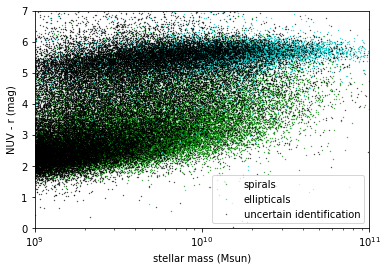

In [89]:
plt.savefig('../initial_plots/morph_color_mass.png')
plt.show()